# Hackathon 9/5/2024
- 4-D Denoising User Story in Jupyter Notebook
- Downloaded PET scans from Open Neuro and ran denoising cleaning using poetry

# Hackathon 9/10/2024
- Was able to showcase images before and after denoising cleaning using nibabel and nilearn packages 

## We will be using the poetry run denoise command 
- Follow the set up steps in the github repository in order to get the poetry command working.   
https://github.com/NIA-IRP/NIA_Hackathon_2024/tree/main/TEAM_06

- This is where I got my dataset: https://openneuro.org/datasets/ds001420/versions/1.2.0

# NIFTI file viewer
Program to see nifti files
MIPAV   
Ask NIH IT to download this on your laptop  
https://mipav.cit.nih.gov   

# Links that I've been using to figure stuff out
- https://nipy.org/nibabel/gettingstarted.html
- https://doubleshow.github.io/bai-book/labs/lab-image/index.html
- https://stackoverflow.com/questions/62217462/decompress-nifti-medical-image-in-gz-format-using-python
- https://stackoverflow.com/questions/46712432/how-to-get-number-of-images-in-nifti-object-nibabel

# Steps
1. Do a git clone of this repository:
    a. GitHub link [Repository](https://github.com/NIA-IRP/NIA_Hackathon_2024/tree/main/TEAM_06)
1. Download a dataset from Open Neuro  
    a. make sure to grab both the .nii and the .json file  
    b. Link to [Open Neuro](https://openneuro.org/datasets)  
    c. This is the link to the specific dataset used for this notebook: [Dataset](https://openneuro.org/datasets/ds001420/versions/1.2.0)  
    d. Place the downloaded dataset in a different repository than your git clone  
    * User note: Sometimes there are issues with symbolic links. If possible download the entire repository if possible. You will run into this issue if using a government issued laptop.  
1. Create a conda enviornment from the pyproject.toml file in the git repository
    a. run this command `conda env create -f pyproject.toml`
    b. This will allow you to use all of the poetry commands
1. Once your conda enviornment is all set up, feel free to open up the `4-D_Denoising_User_Story.ipynb` Jupyter Notebook:  
    a. Be sure to select the kernal created from the `conda env create -f pyproject.toml`  
    b. Run the notebook by selecting `Run All`

In [36]:
import csv
import os
import warnings

import numpy as np 
import nibabel as nib
import matplotlib.pyplot as plt

from nilearn import plotting
from nilearn.image import index_img


In [37]:
# remember to install datalad and git-annex using conda install so you can work with the dataset from openneuro
# git-annex only works on linux enviornments 
# you can also manually download the files themselves if git-annex isn't working
# refer to the dataset link above 
#### make sure to grab both the .nii and the .json file

In [38]:
# example code to run:
# $ poetry run denoise PET --model SRTMZhou2003 --refmask <REFMASK> --outputdir <OUTPUTDIR> --fwhm 5

In [39]:
# This doesn't work because I need to add the symbolic link packages as mentioned above. 
# For now I'm going to try and manually download them, add them to a folder, and then reference it



# 9/5/2024 3pm version
### you can change the value next to --fwhm (in mm) 
# https://dynamicpet.readthedocs.io/en/latest/usage.html

### Code I used to create the cleaned images 
# poetry run denoise --method HYPRLR --fwhm 5 --outputdir /Users/uriartelopezjr/Documents/hackathon/dynamicpet/denoise_output /Users/uriartelopezjr/Documents/hackathon/open_neuro_data/sub-01_ses-baseline_pet.nii.gz

In [40]:
# after we create the denoised dataset, we will then use these jupyter commands to open the files
# I couldn't get IT to download the NIFTI file viewer so I'm using these packages instead 

In [41]:
# testing 
denoise_image_path = '/Users/uriartelopezjr/Documents/hackathon/open_neuro_data/denoise_output/sub-01_ses-baseline_pet_hyprlr.nii.gz'
nii_img = nib.load(denoise_image_path)
nii_data = nii_img.get_fdata()

In [42]:
nii_img.shape

(256, 256, 207, 32)

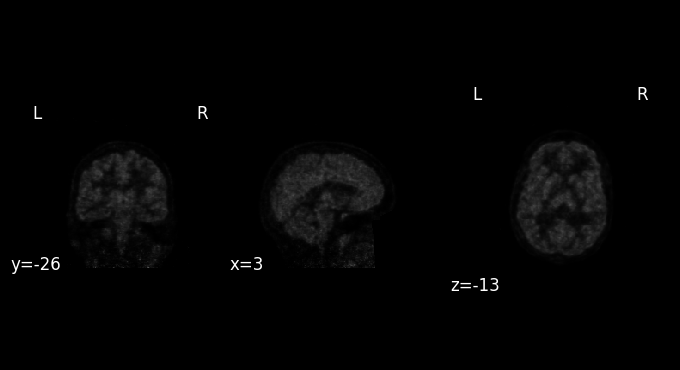

In [46]:
# denoise (cleaned) image at slice 16
clean_image = plotting.plot_anat(index_img(denoise_image_path, 16), draw_cross=False)
clean_image
# to turn off croshairs, do draw_cross=False

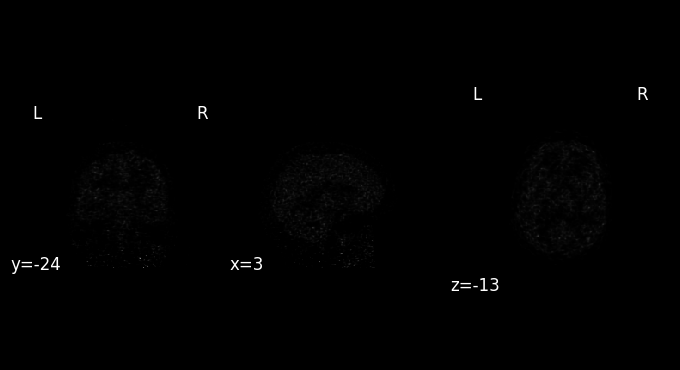

In [47]:
# noisy image (raw) at slice 16
raw_image_path = '/Users/uriartelopezjr/Documents/hackathon/open_neuro_data/raw/sub-01_ses-baseline_pet.nii.gz'

raw_image = plotting.plot_anat(index_img(raw_image_path, 16), draw_cross=False)
raw_image

Image time series slice: 11
Image time series slice: 12
Image time series slice: 13
Image time series slice: 14
Image time series slice: 15
Image time series slice: 16
Image time series slice: 17
Image time series slice: 18
Image time series slice: 19
Image time series slice: 20
Image time series slice: 21
Image time series slice: 22
Image time series slice: 23
Image time series slice: 24
Image time series slice: 25
Image time series slice: 26
Image time series slice: 27
Image time series slice: 28
Image time series slice: 29
Image time series slice: 30
Image time series slice: 31


/Users/uriartelopezjr/Library/Caches/pypoetry/virtualenvs/dynamicpet-9lkmTgRy-py3.12/lib/python3.12/site-packages/nilearn/plotting/displays/_slicers.py:160: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure(figure, figsize=figsize, facecolor=facecolor)


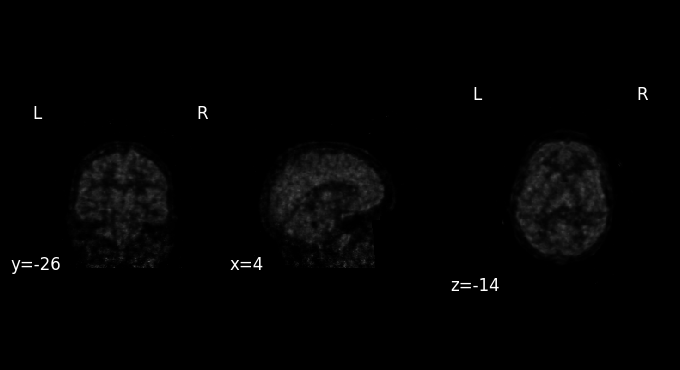

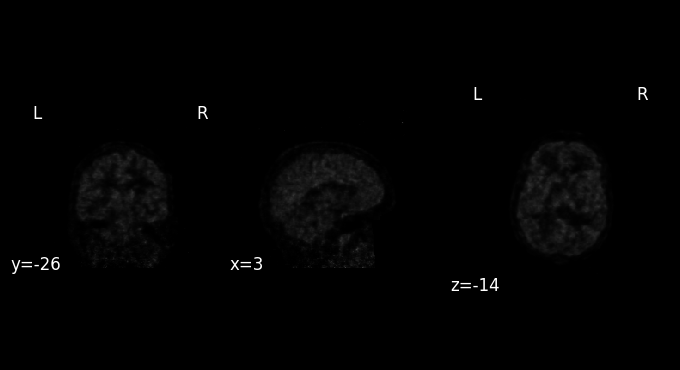

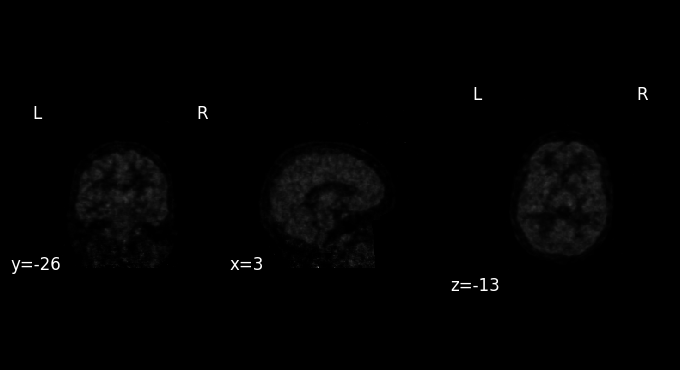

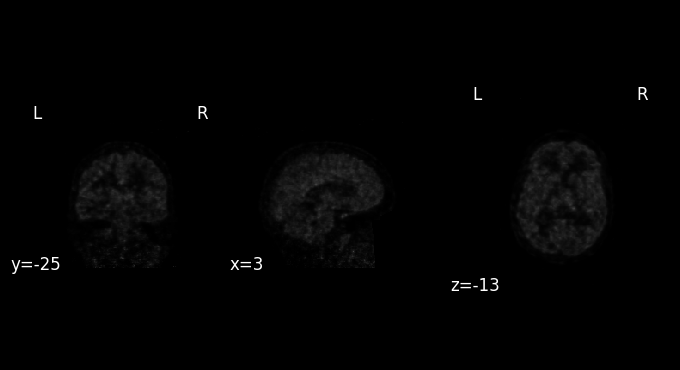

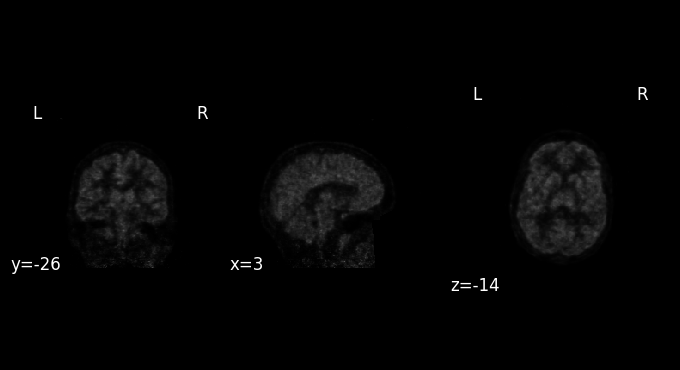

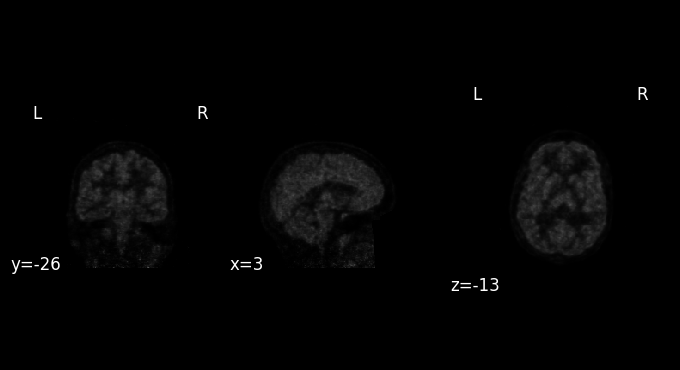

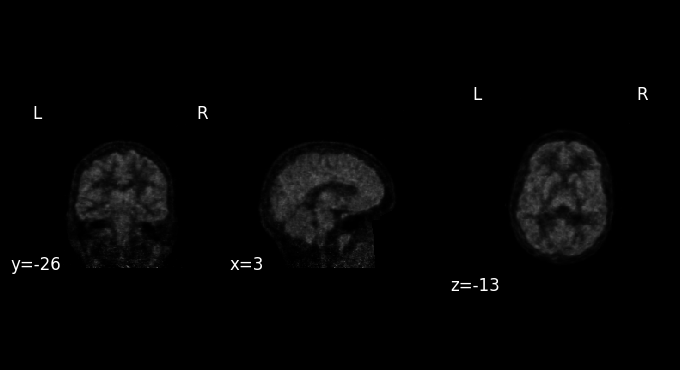

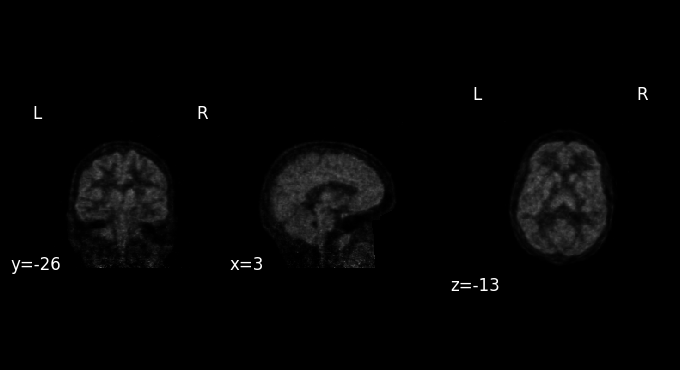

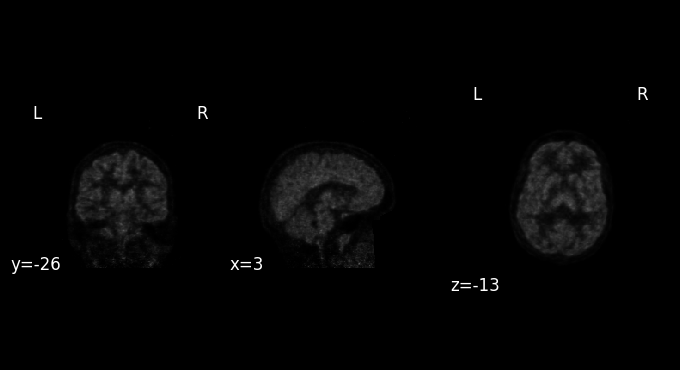

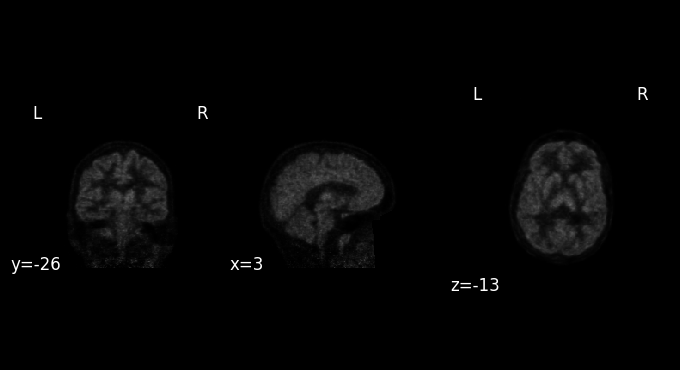

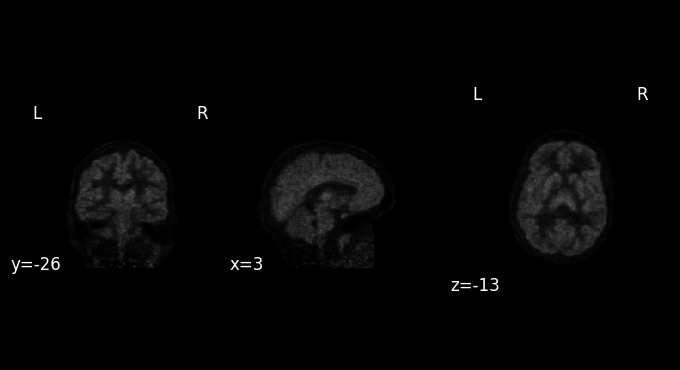

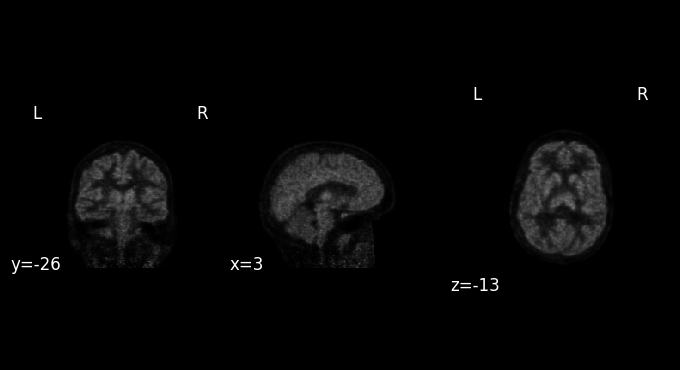

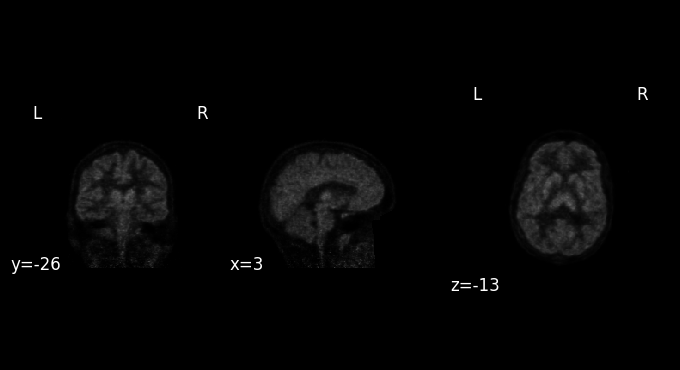

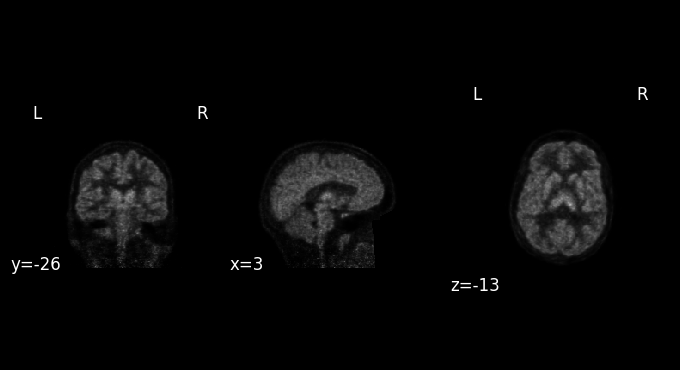

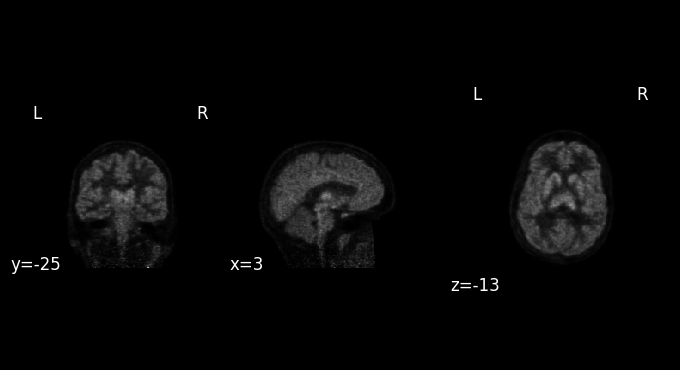

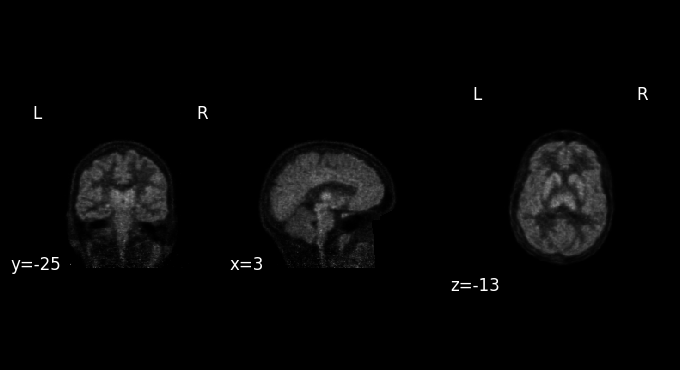

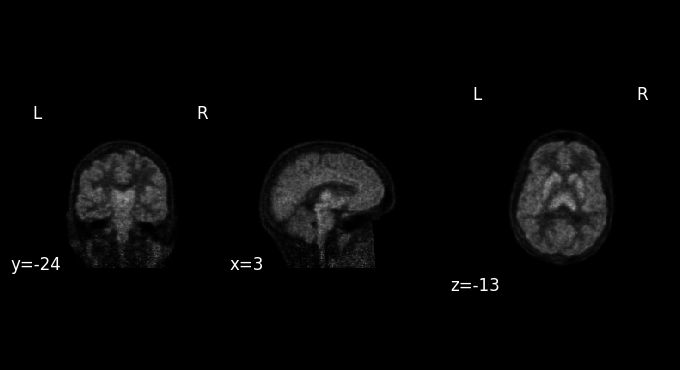

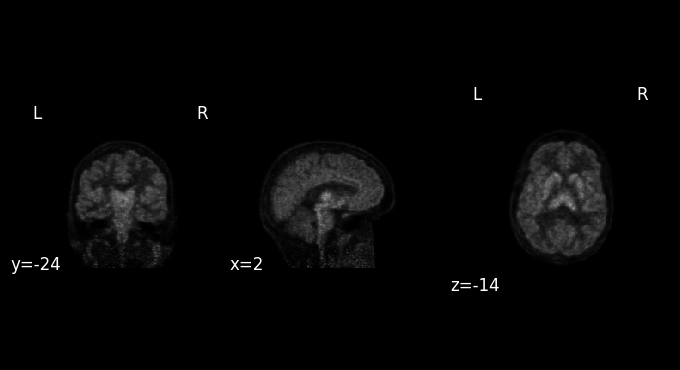

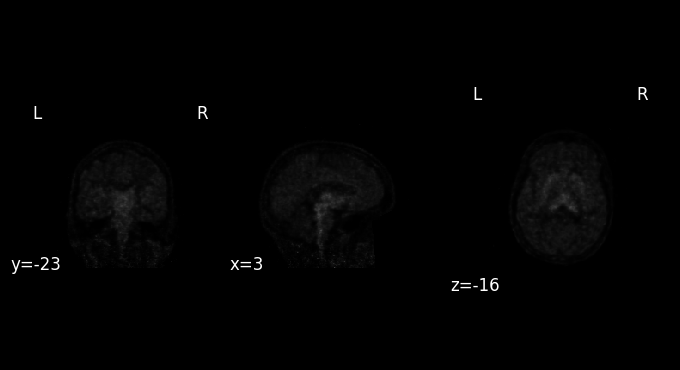

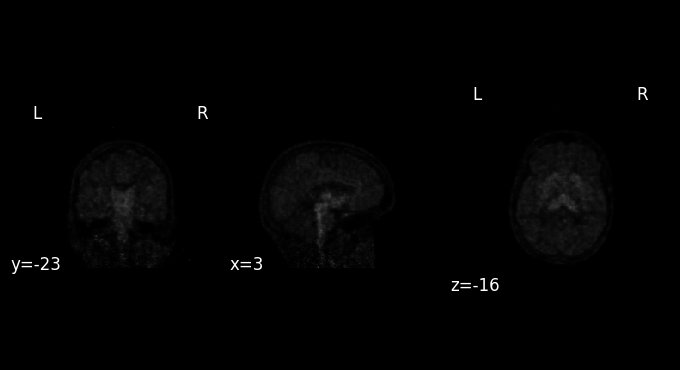

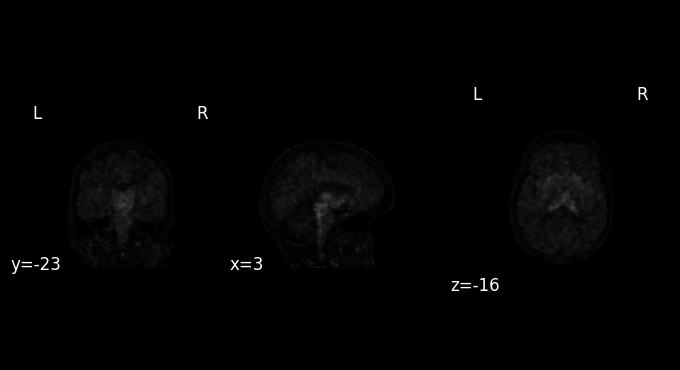

In [51]:
# get mulitple images using command
# to get number of slices use these commands
# denoise_image_path = '/Users/uriartelopezjr/Documents/hackathon/open_neuro_data/denoise_output/sub-01_ses-baseline_pet_hyprlr.nii.gz'
# nii_img = nib.load(denoise_image_path)
# nii_data = nii_img.get_fdata()
# output: (256, 256, 207, 32)
# the 32 is the total number of time series slices
# clean_image = plotting.plot_anat(index_img(denoise_image_path, 16), draw_cross=False) ### example to see time slice 16

denoise_image_path = '/Users/uriartelopezjr/Documents/hackathon/open_neuro_data/denoise_output/sub-01_ses-baseline_pet_hyprlr.nii.gz'

for i in range(11, 32): # we ignore the first few since they're all black or low resolution images
    print('Image time series slice:', i)
    plotting.plot_anat(index_img(denoise_image_path, i), draw_cross=False) ### example to see time slice 16

Image time series slice: 11
Image time series slice: 12
Image time series slice: 13
Image time series slice: 14
Image time series slice: 15
Image time series slice: 16
Image time series slice: 17
Image time series slice: 18
Image time series slice: 19
Image time series slice: 20
Image time series slice: 21
Image time series slice: 22
Image time series slice: 23
Image time series slice: 24
Image time series slice: 25
Image time series slice: 26
Image time series slice: 27
Image time series slice: 28
Image time series slice: 29
Image time series slice: 30
Image time series slice: 31


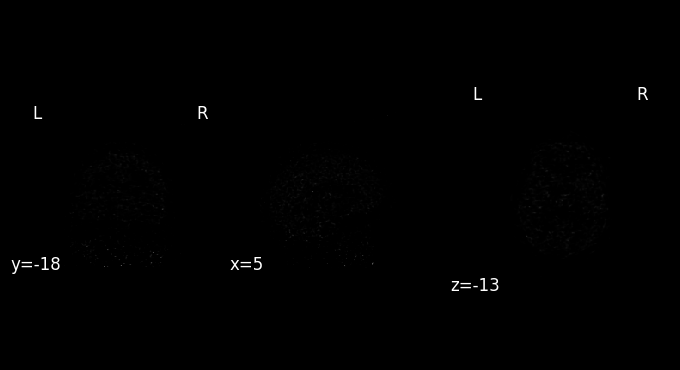

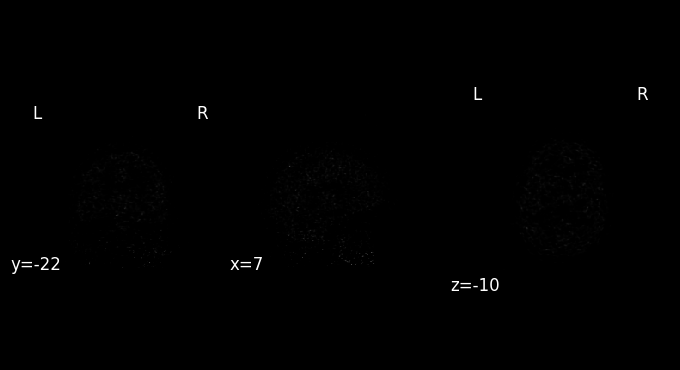

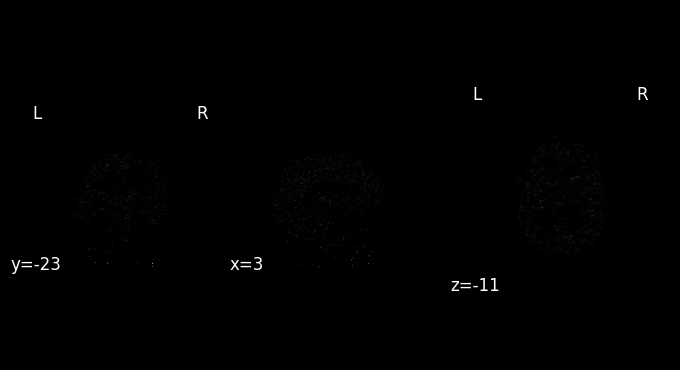

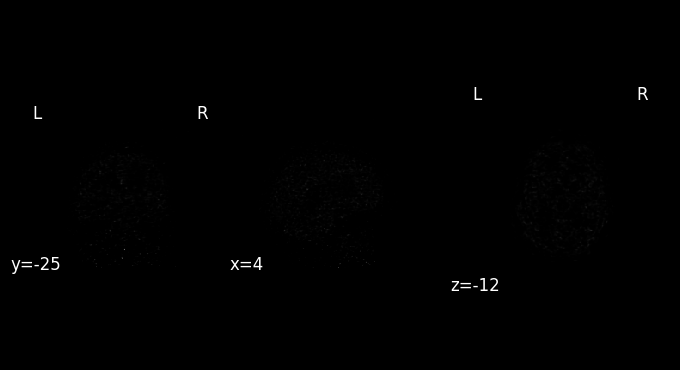

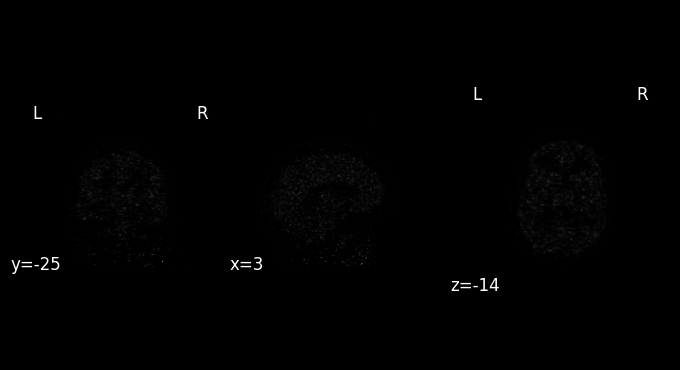

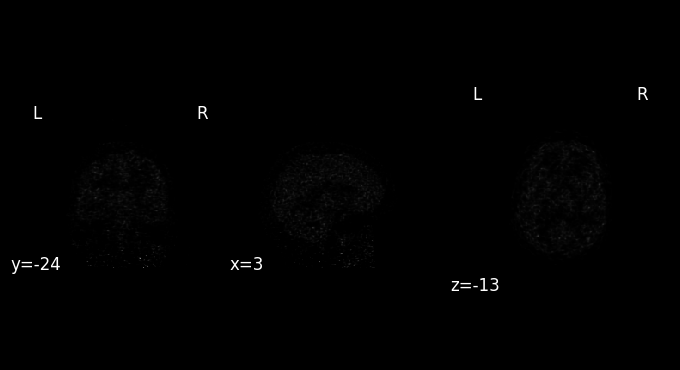

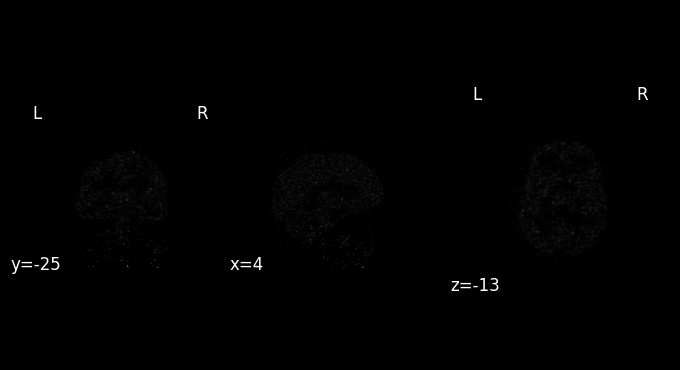

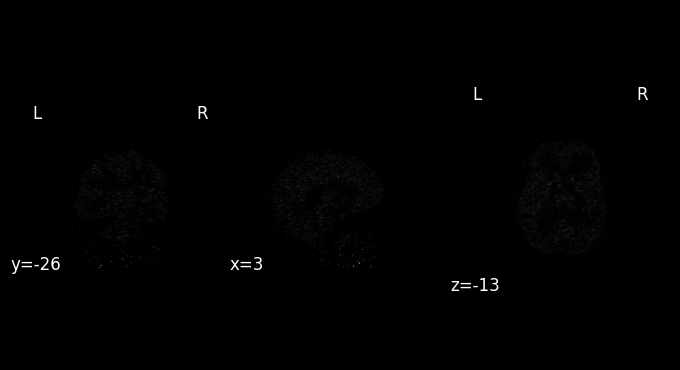

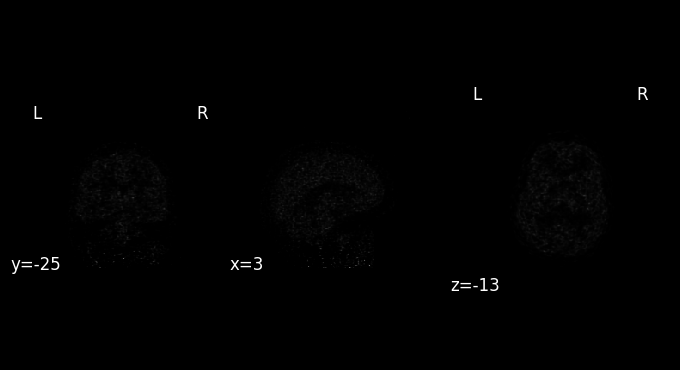

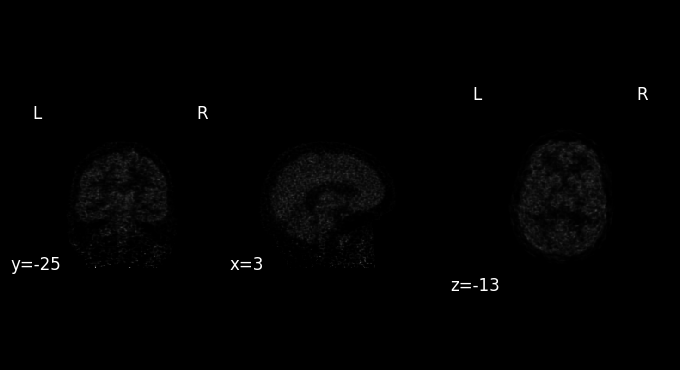

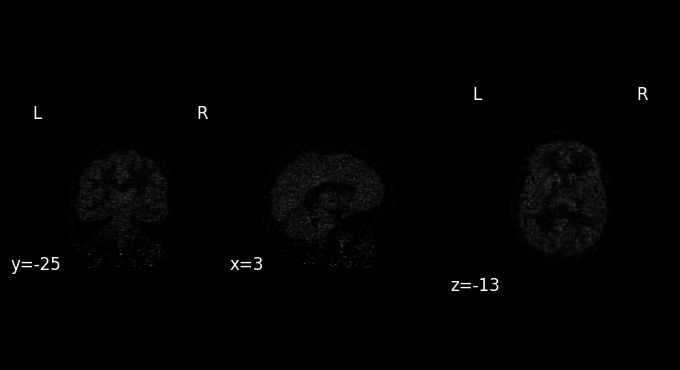

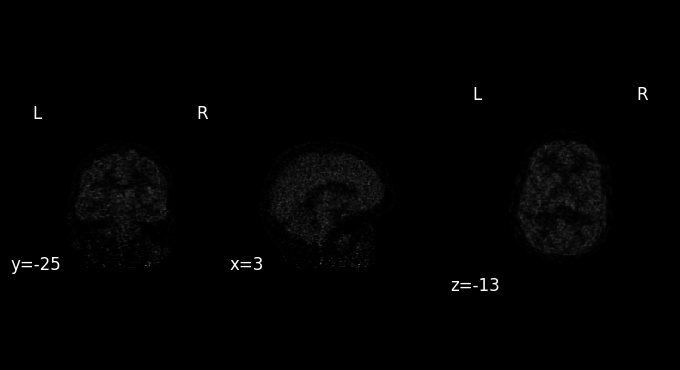

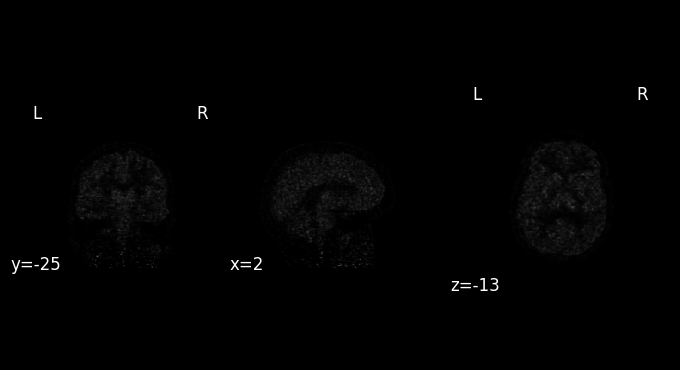

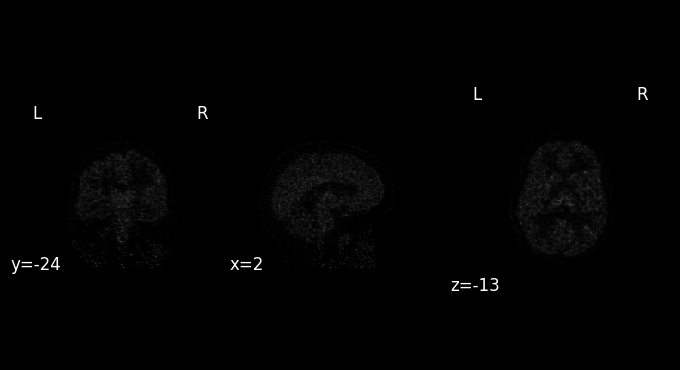

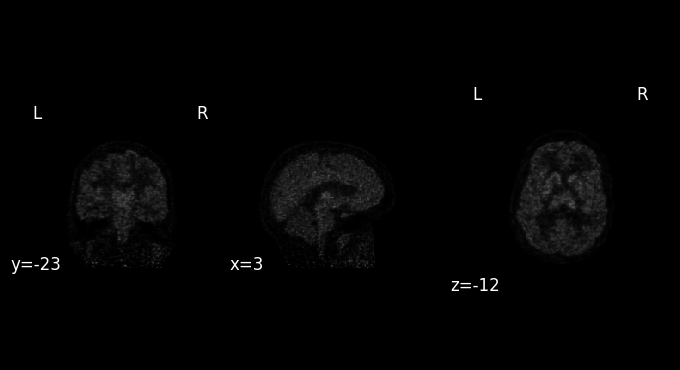

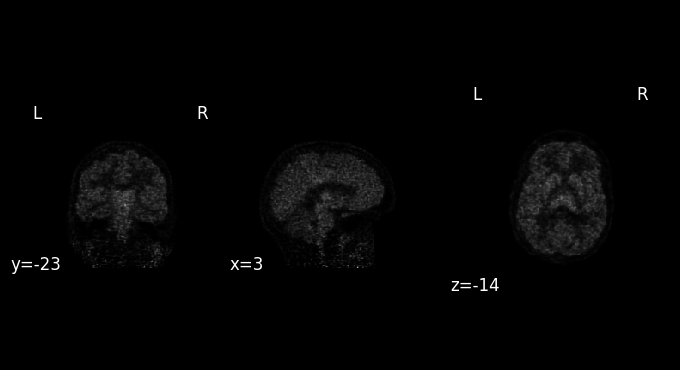

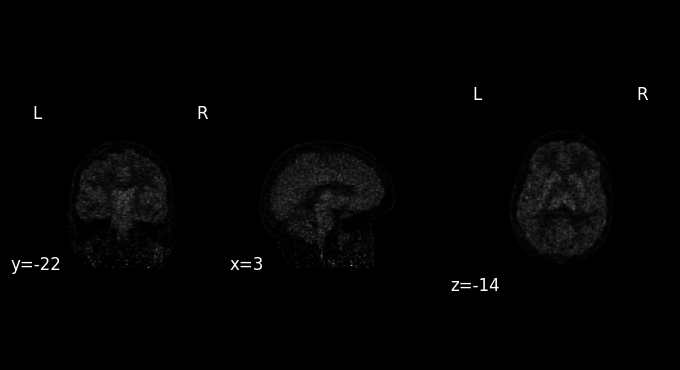

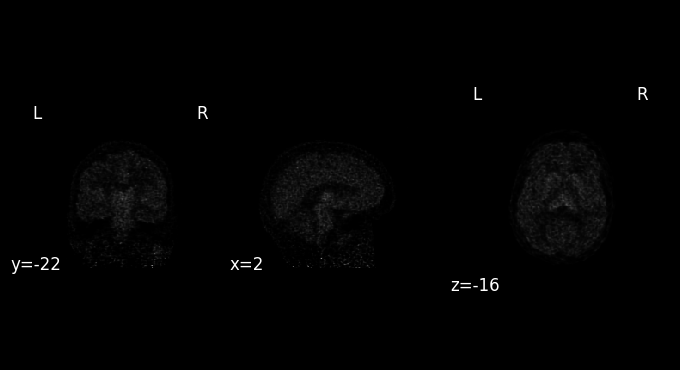

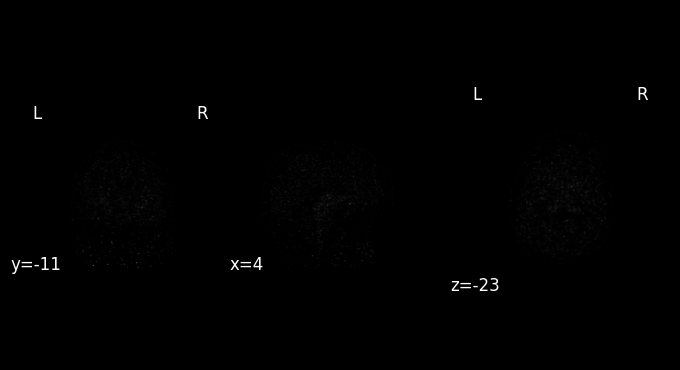

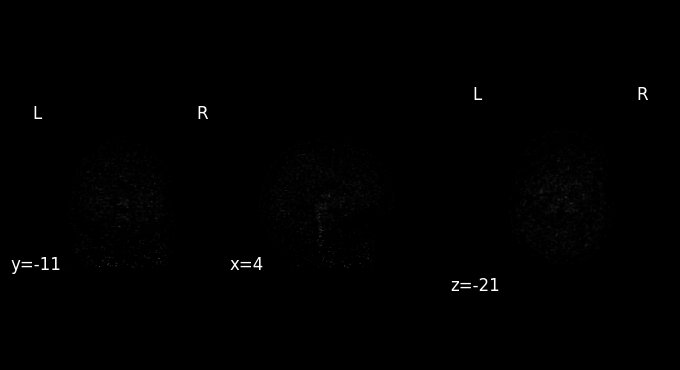

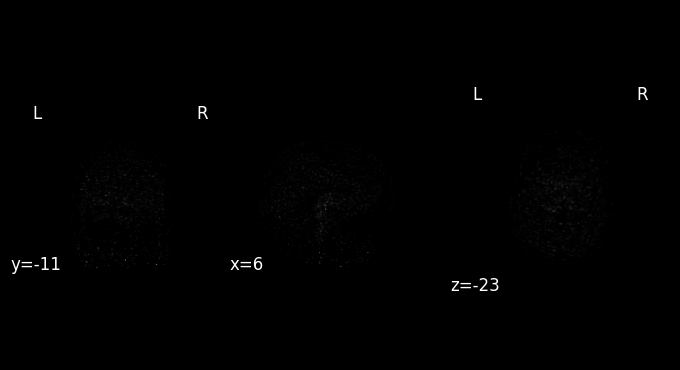

In [52]:
raw_image_path = '/Users/uriartelopezjr/Documents/hackathon/open_neuro_data/raw/sub-01_ses-baseline_pet.nii.gz'

for i in range(11, 32): # we ignore the first few since they're all black or low resolution images
    print('Image time series slice:', i)
    plotting.plot_anat(index_img(raw_image_path, i), draw_cross=False) ### example to see time slice 16